## Reduce the dimensionality of the given database to 2 dimenson

### Read the traing data

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import glob
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

%config InlineBackend.figure_format = 'png'
%config InlineBackend.rc = {'figure.figsize': (12, 12), 'savefig.dpi': 300, 'figure.autolayout': True}

In [2]:
train_filenames = glob.glob('../../Lecture 4/Data/train*.txt')
train_filenames.sort()

train_datas = [np.loadtxt(filename) for filename in train_filenames]
train_labels = [[i] * len(train_datas[i]) for i in range(len(train_datas))]

In [3]:
train_data = np.concatenate(train_datas)
train_label = np.concatenate(train_labels)

print(f'Train data shape: {train_data.shape}')
print(f'Train label shape: {train_label.shape}')

Train data shape: (60000, 784)
Train label shape: (60000,)


## Principal Components Analysis on 10 classes

In [4]:
pca = PCA(n_components=2)

pca.fit(train_data)

new_coordinates = np.vstack((pca.transform(train_data).T, train_label)).T

train_df = pd.DataFrame(data=new_coordinates, columns=('1st_principal', '2nd_principal', 'label'))
train_df.head()

,1st_principal,2nd_principal,label
0,1011.718666,-294.857933,0.0
1,1037.650581,-354.925264,0.0
2,610.291239,-239.776467,0.0
3,933.878065,-243.292906,0.0
4,1663.961351,-90.815563,0.0


In [5]:
train_df.to_csv('../Data/train_10_calasses.csv', index=False)

### Plot the result

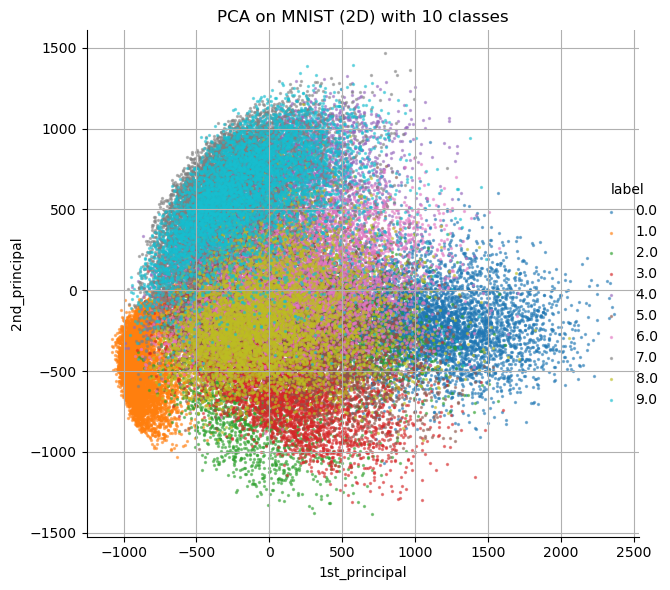

In [6]:
sns.FacetGrid(train_df, hue='label', height=6).map(plt.scatter, '1st_principal', '2nd_principal', s=2, alpha=0.5).add_legend()
plt.title('PCA on MNIST (2D) with 10 classes')
plt.grid()
plt.show()

## Principal Components Analysis on the 3 selected classes [5, 6, 8]

In [7]:
SELECTED_CLASSES = [5, 6, 8]

selected_train_data = train_data[np.isin(train_label, SELECTED_CLASSES)]
selected_train_label = train_label[np.isin(train_label, SELECTED_CLASSES)]

In [8]:
pca = PCA(n_components=2)

pca.fit(selected_train_data)

new_coordinates = np.vstack((pca.transform(selected_train_data).T, selected_train_label)).T

selected_train_df = pd.DataFrame(data=new_coordinates, columns=('1st_principal', '2nd_principal', 'label'))
selected_train_df.head()

,1st_principal,2nd_principal,label
0,-383.501498,-18.825309,5.0
1,-122.315822,-649.597358,5.0
2,-348.289293,-692.391550,5.0
3,-652.952302,-656.562123,5.0
4,-224.849709,-642.848015,5.0


In [9]:
selected_train_df.to_csv('../Data/train_3_calasses.csv', index=False)

### Plot the results

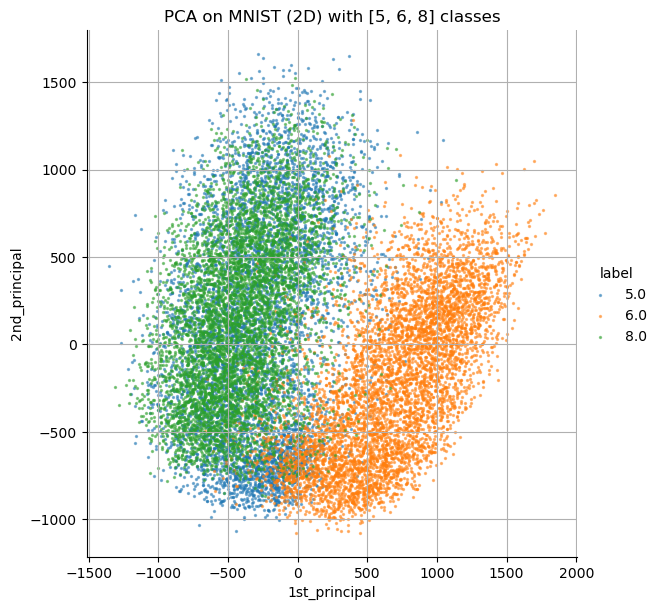

In [10]:
sns.FacetGrid(selected_train_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal', s=2, alpha=0.5).add_legend()
plt.title(f'PCA on MNIST (2D) with {SELECTED_CLASSES} classes')
plt.grid()
plt.show()